In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [33]:
%matplotlib inline

In [34]:
df = pd.read_csv('kyphosis.csv')

In [35]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [37]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [38]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

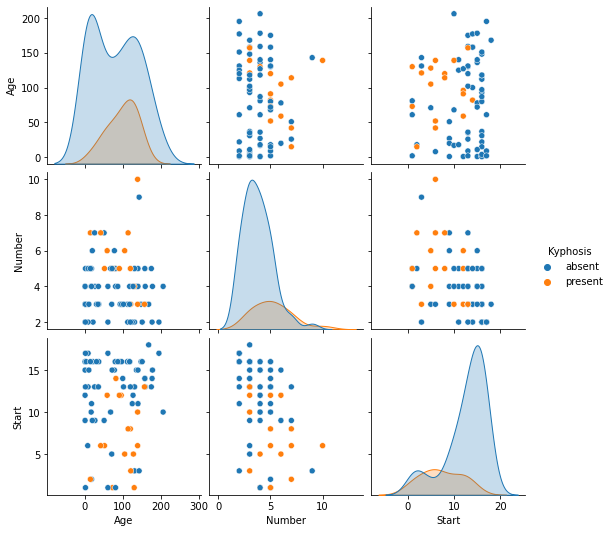

In [39]:
sns.pairplot(df, hue = 'Kyphosis' )

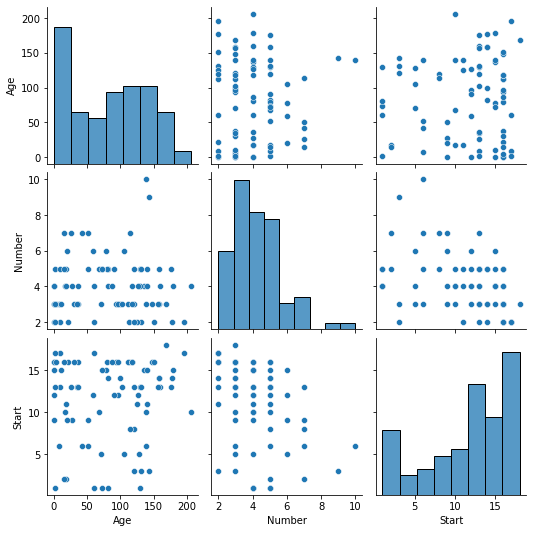

In [40]:
sns.pairplot(df)

In [41]:
df.corr()

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


In [42]:
df.quantile([0.25,0.5,0.75])

,Age,Number,Start
0.25,26.0,3.0,9.0
0.50,87.0,4.0,13.0
0.75,130.0,5.0,16.0


In [43]:
df.isnull()

,Kyphosis,Age,Number,Start
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
76,False,False,False,False
77,False,False,False,False
78,False,False,False,False
79,False,False,False,False


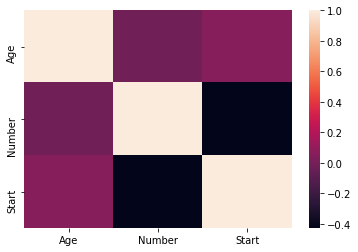

In [44]:
sns.heatmap(df.corr())

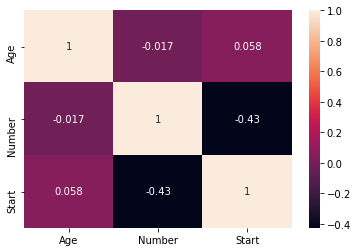

In [45]:
sns.heatmap(df.corr(), annot = True)

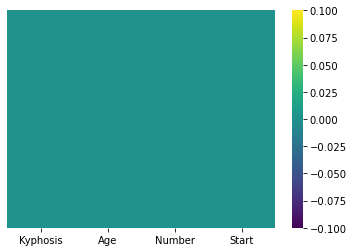

In [46]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap ='viridis')

In [47]:
X  = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression()

In [52]:
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [53]:
Predictions = logmodel.predict(X_test)

In [54]:
Predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent'], dtype=object)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(classification_report(Y_test,Predictions))

              precision    recall  f1-score   support

      absent       0.73      1.00      0.84        19
     present       1.00      0.12      0.22         8

    accuracy                           0.74        27
   macro avg       0.87      0.56      0.53        27
weighted avg       0.81      0.74      0.66        27



In [57]:
print(confusion_matrix(Y_test,Predictions))

[[19  0]
 [ 7  1]]
